In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
points = np.load('/project2/alvinjin_1630/simulated_data/circles_type_8/points.npy')
labels = np.load('/project2/alvinjin_1630/simulated_data/circles_type_8/labels.npy')

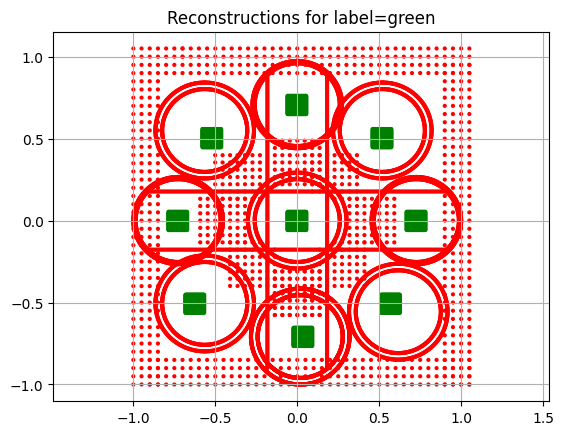

In [118]:
# indices = np.where((points[:,0] <= 0.18) & (points[:,0] >= -0.18) & (points[:,1] >= -0.18) & (points[:,1] <= 0.18))[0]
indices = np.where(
    ~(
        (
            (points[:, 0] >= -0.15)
            & (points[:, 0] <= 0.15)
            & (
                ((points[:, 1] >= -0.15) & (points[:, 1] <= -0.10))
                | ((points[:, 1] >= 0.10) & (points[:, 1] <= 0.15))
            )
        )
        | (points[:, 0] < -1)
    )
)[0]
points = points[indices]
labels = labels[indices]

to_add = [[x, y] for x in np.arange(-1.0, -0.7, 0.05) for y in [1.0, 1.05]]
points = np.concatenate((points, to_add))
labels = np.concatenate((labels, [1] * len(to_add)))

to_add = [[x, y] for x in np.arange(-0.8, -0.75, 0.05) for y in [0.9, 0.95]]
points = np.concatenate((points, to_add))
labels = np.concatenate((labels, [1] * len(to_add)))

np.savez('/project2/alvinjin_1630/results/D1/full_dataset.npz', points=points, labels=labels)

colors = ['green' if val == 0 else 'red' for val in labels]
plt.scatter(points[:,0], points[:,1], s=4, c=colors)
plt.title("Reconstructions for label=green")
plt.axis("equal")
plt.grid(True)
plt.show()

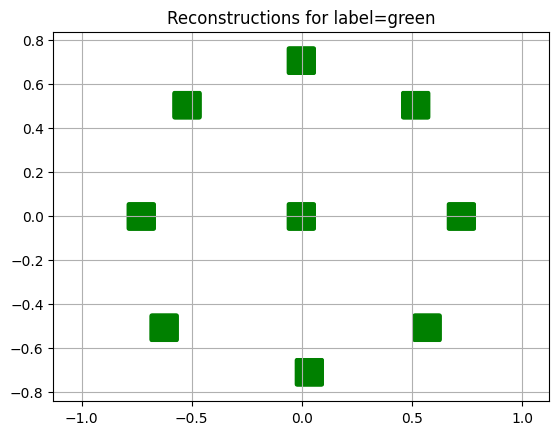

In [122]:
data = np.load('/project2/alvinjin_1630/results/D1/full_dataset.npz')
p = data['points']
l = data['labels']

indices = np.where(l == 0)
p = p[indices]
l = l[indices]

colors = ['green' if val == 0 else 'red' for val in l]
plt.scatter(p[:,0], p[:,1], s=4, c=colors)
plt.title("Reconstructions for label=green")
plt.axis("equal")
plt.grid(True)
plt.show()